In [42]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
# Read in the data.
df = pd.read_csv('./eda_using_basic_data_functions_in_python_dataset1.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [44]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [45]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [46]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2018-01-03,194,POINT(-75 27),2018-W01,2018-01,2018-Q1,2018
1,2018-01-03,41,POINT(-78.4 29),2018-W01,2018-01,2018-Q1,2018
2,2018-01-03,33,POINT(-73.9 27),2018-W01,2018-01,2018-Q1,2018
3,2018-01-03,38,POINT(-73.8 27),2018-W01,2018-01,2018-Q1,2018
4,2018-01-03,92,POINT(-79 28),2018-W01,2018-01,2018-Q1,2018
5,2018-01-03,119,POINT(-78 28),2018-W01,2018-01,2018-Q1,2018
6,2018-01-03,35,POINT(-79.3 28),2018-W01,2018-01,2018-Q1,2018
7,2018-01-03,60,POINT(-79.1 28),2018-W01,2018-01,2018-Q1,2018
8,2018-01-03,41,POINT(-78.7 28),2018-W01,2018-01,2018-Q1,2018
9,2018-01-03,119,POINT(-78.6 28),2018-W01,2018-01,2018-Q1,2018


In [58]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' in the sum() function or else it will throw an error

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Text(0.5, 1.0, 'Number of lightning strikes per week (2018)')

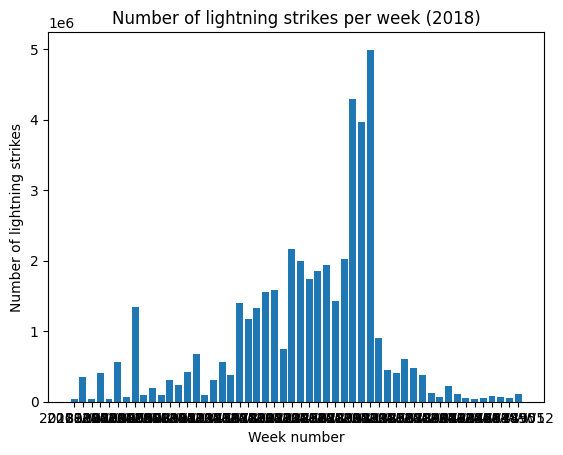

In [48]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")

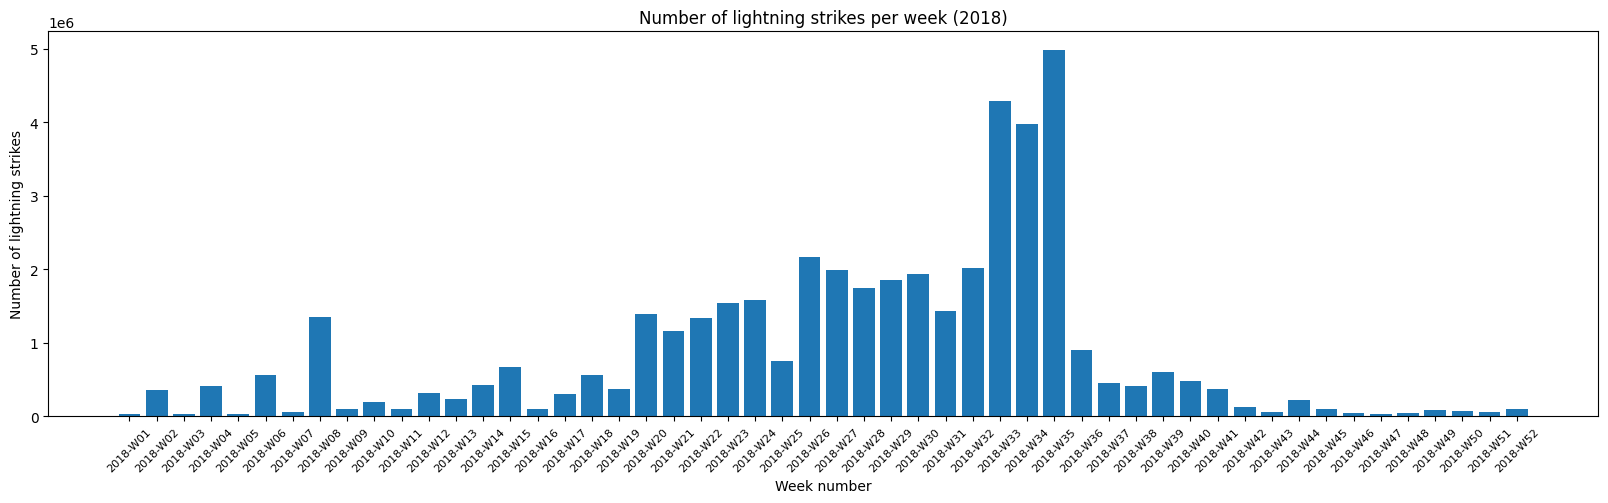

In [49]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

In [52]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000194
1    0.000041
2    0.000033
3    0.000038
4    0.000092
Name: number_of_strikes, dtype: float64

In [64]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2018-Q1,3785528,3.8M
1,2018-Q2,12136148,12.1M
2,2018-Q3,26863991,26.9M
3,2018-Q4,1815322,1.8M


In [54]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

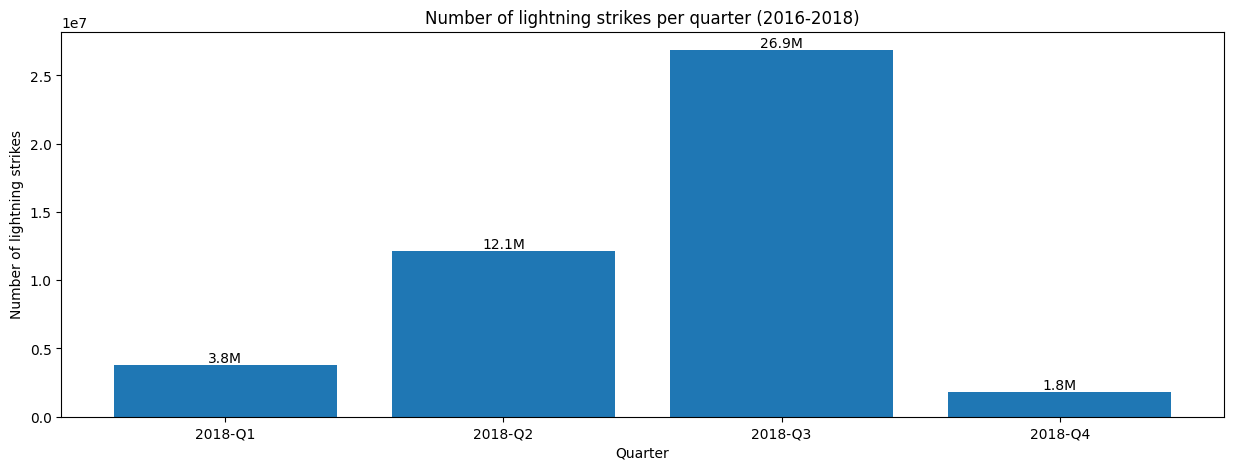

In [55]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

In [56]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2018-Q1,3785528,3.8M,Q1,2018
1,2018-Q2,12136148,12.1M,Q2,2018
2,2018-Q3,26863991,26.9M,Q3,2018
3,2018-Q4,1815322,1.8M,Q4,2018


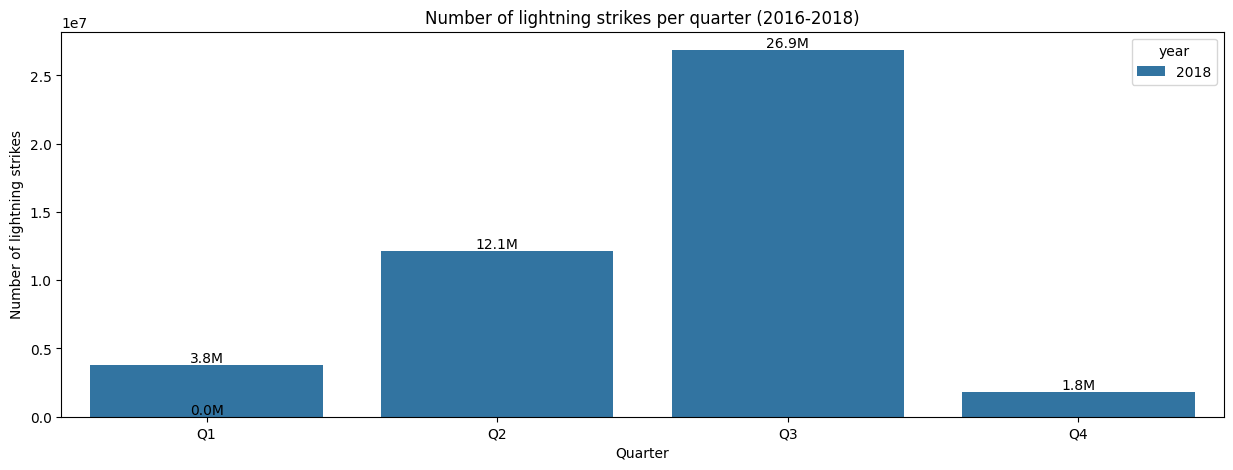

In [57]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()